In [1]:
import pandas as pd 
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
my_data = pd.read_csv("C:/Users/ADMIN/BAOHUY/Phan_tich_du_lieu/unemployeed_female.csv")

In [5]:
my_data 

,Năm,Tổng số,Đồng bằng sông Hồng,Trung du và miền núi phía Bắc,Bắc Trung Bộ và duyên hải miền Trung,Tây Nguyên,Đông Nam Bộ,Đồng bằng sông Cửu Long
0,2018,2.45,1.91,1.20,3.08,1.63,2.59,3.59
1,2019,2.26,1.67,0.96,2.46,1.47,2.46,4.03
2,2020,3.05,2.27,1.17,3.77,2.27,4.04,4.03
3,2021,3.26,1.91,2.12,3.41,1.26,4.84,4.68
4,2022,2.32,1.79,1.76,2.94,0.85,2.62,3.02
5,2023,2.25,1.60,1.77,2.55,0.85,2.81,3.08


In [7]:
my_data[["Đồng bằng sông Hồng", "Trung du và miền núi phía Bắc", "Bắc Trung Bộ và duyên hải miền Trung", "Tây Nguyên", "Đông Nam Bộ", "Đồng bằng sông Cửu Long"]].describe()

,Đồng bằng sông Hồng,Trung du và miền núi phía Bắc,Bắc Trung Bộ và duyên hải miền Trung,Tây Nguyên,Đông Nam Bộ,Đồng bằng sông Cửu Long
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.858333,1.496667,3.035000,1.388333,3.226667,3.738333
std,0.237353,0.450629,0.501548,0.536374,0.979707,0.636912
min,1.600000,0.960000,2.460000,0.850000,2.460000,3.020000
25%,1.700000,1.177500,2.647500,0.952500,2.597500,3.207500
50%,1.850000,1.480000,3.010000,1.365000,2.715000,3.810000
75%,1.910000,1.767500,3.327500,1.590000,3.732500,4.030000
max,2.270000,2.120000,3.770000,2.270000,4.840000,4.680000


In [9]:
from scipy.stats import f_oneway

In [15]:
f_stat, p_value = f_oneway(my_data["Tổng số"], my_data["Đồng bằng sông Hồng"], my_data["Trung du và miền núi phía Bắc"], my_data["Bắc Trung Bộ và duyên hải miền Trung"], my_data["Tây Nguyên"], my_data["Đông Nam Bộ"], my_data["Đồng bằng sông Cửu Long"])

In [17]:
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 14.86
P-value: 0.0000


In [19]:
if p_value < 0.05:
    print("Bác bỏ H0. Có sự khác biệt ý nghĩa giữa các nhóm.")
else:
    print("Không bác bỏ H0. Không có sự khác biệt ý nghĩa giữa các nhóm.")

Bác bỏ H0. Có sự khác biệt ý nghĩa giữa các nhóm.


In [21]:
tukey_data = pd.read_excel("C:/Users/ADMIN/BAOHUY/Phan_tich_du_lieu/unemployee_female_tukey.xlsx")

In [23]:
tukey_data

,unemployee_rate,area
0,2.45,1
1,2.26,1
2,3.05,1
3,3.26,1
4,2.32,1
5,2.25,1
6,1.91,2
7,1.67,2
8,2.27,2
9,1.91,2


In [25]:
tukey = pairwise_tukeyhsd(endog=tukey_data['unemployee_rate'], groups=tukey_data['area'], alpha=0.05)

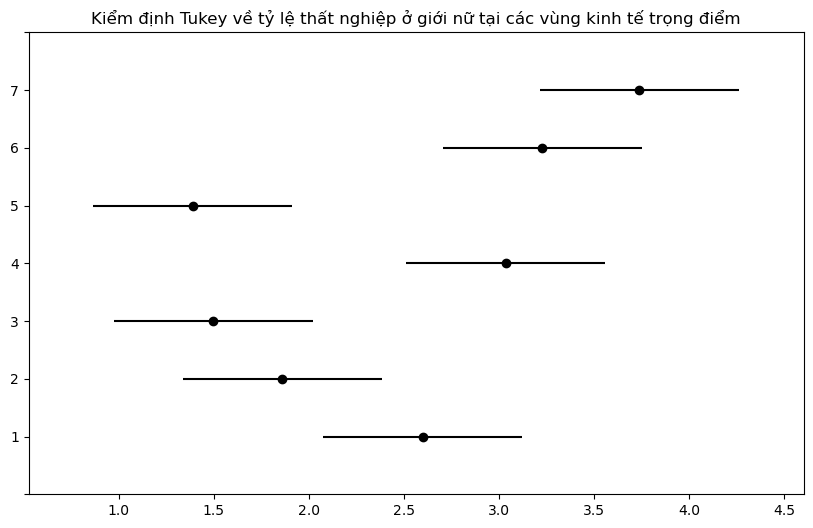

In [27]:
tukey.plot_simultaneous()
import matplotlib.pyplot as plt
plt.title('Kiểm định Tukey về tỷ lệ thất nghiệp ở giới nữ tại các vùng kinh tế trọng điểm')
plt.show()